<a href="https://colab.research.google.com/github/Pruthviraj009/NYC_Taxi_Trip_Time_Predictio/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import geopy.distance
from math import radians,cos,sin,asin,sqrt,atan2
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import datetime as dt
%matplotlib inline

In [58]:
filename='/content/drive/MyDrive/Python Data/Copy of NYC Taxi Data.csv'
df=pd.read_csv(filename)

In [4]:
pip install geopandas

In [5]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


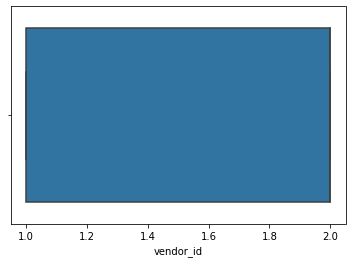

In [10]:
figsize=(12,8)
sns.boxplot(x=df.vendor_id)

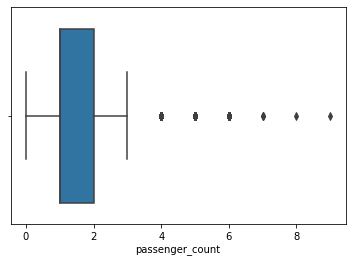

In [11]:
figsize=(12,8)
sns.boxplot(x=df.passenger_count)

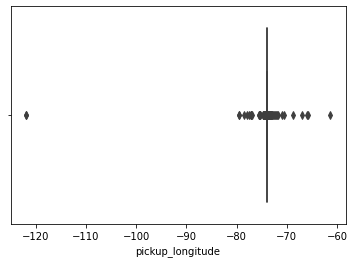

In [12]:
figsize=(12,8)
sns.boxplot(x=df.pickup_longitude)

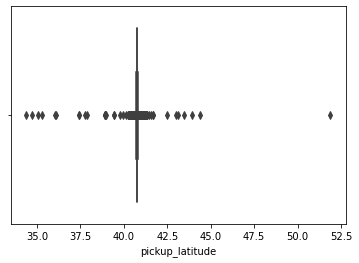

In [13]:
figsize=(20,20)
sns.boxplot(x=df.pickup_latitude)

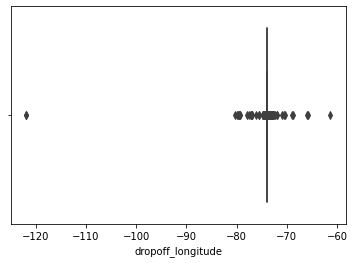

In [14]:
figsize=(12,8)
sns.boxplot(x=df.dropoff_longitude)

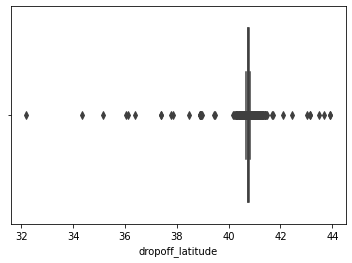

In [15]:
figsize=(12,8)
sns.boxplot(x=df.dropoff_latitude)

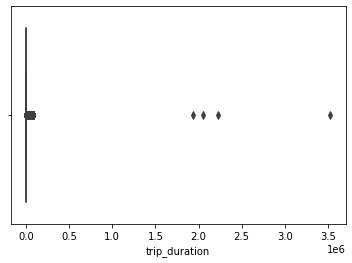

In [16]:
figsize=(12,8)
sns.boxplot(x=df.trip_duration)

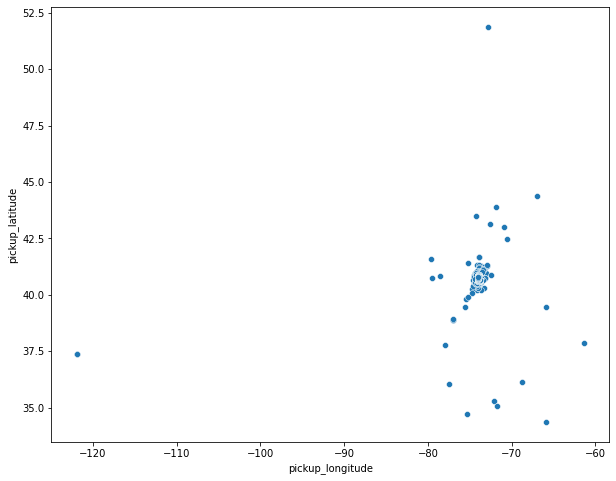

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.pickup_longitude,y=df.pickup_latitude)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


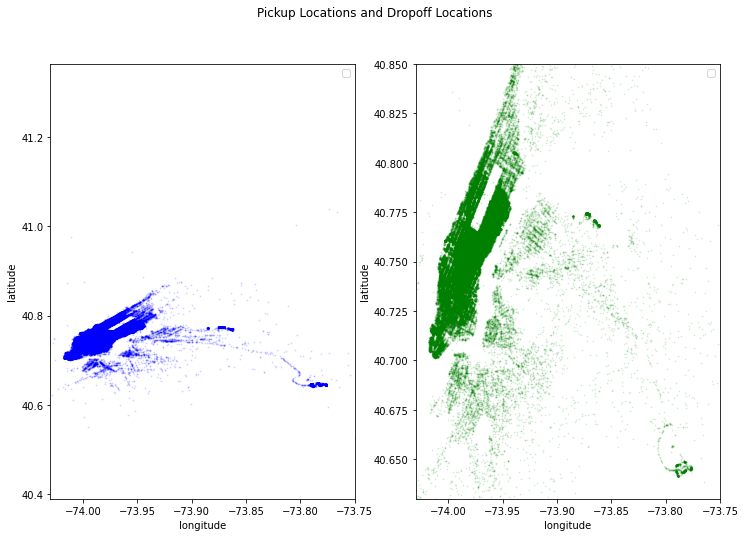

In [18]:
log=(-74.03,-73.75)
lat=(40.63,40.85)
fig, ax= plt.subplots(ncols=2, sharex= True, figsize=(12,8))

ax[0].scatter(df.pickup_longitude[:100000],df.pickup_latitude[:100000],color='blue',s=1,alpha=0.1)
ax[1].scatter(df.dropoff_longitude[:100000],df.dropoff_latitude[:100000],color='green',s=1,alpha=0.1)
fig.suptitle('Pickup Locations and Dropoff Locations')
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].legend()
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')
ax[1].legend()
plt.ylim(lat)
plt.xlim(log)
plt.show()

In [19]:
num_df=df.describe().columns

In [20]:
num_df

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

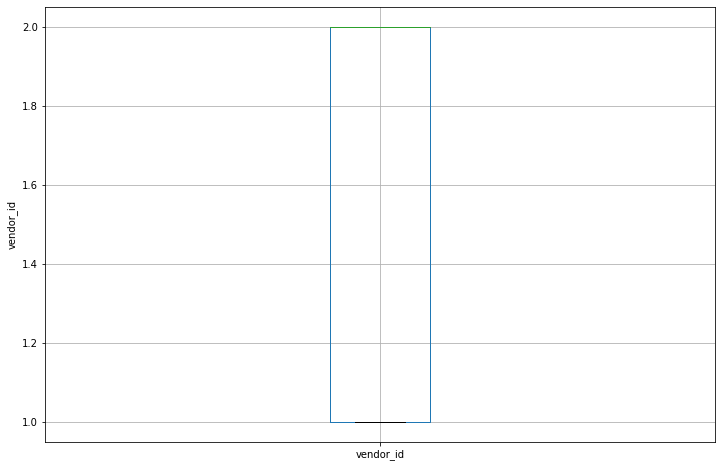

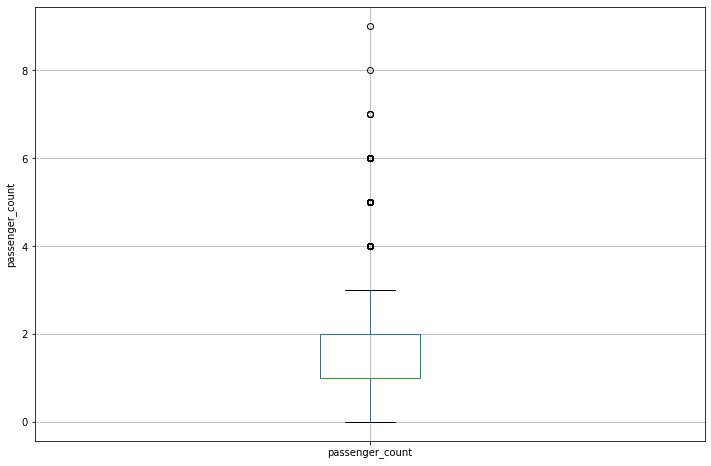

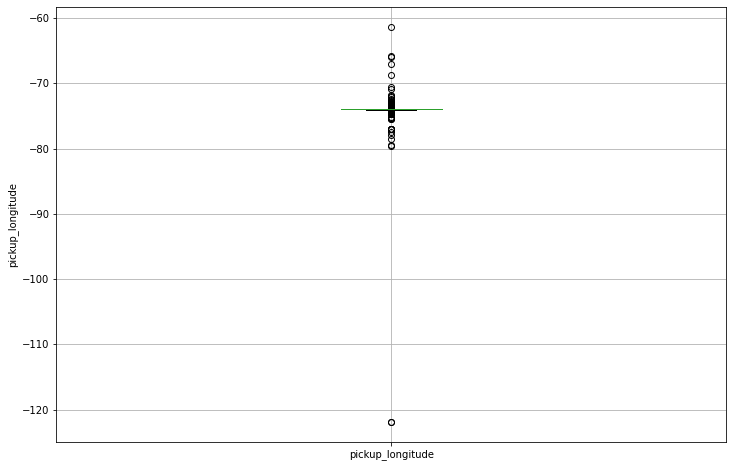

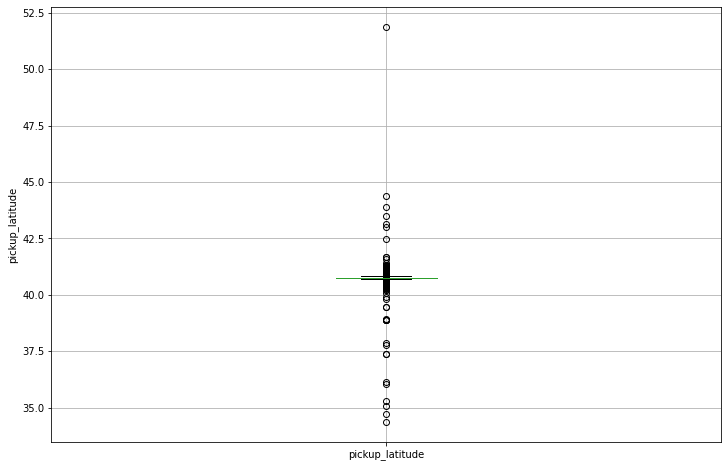

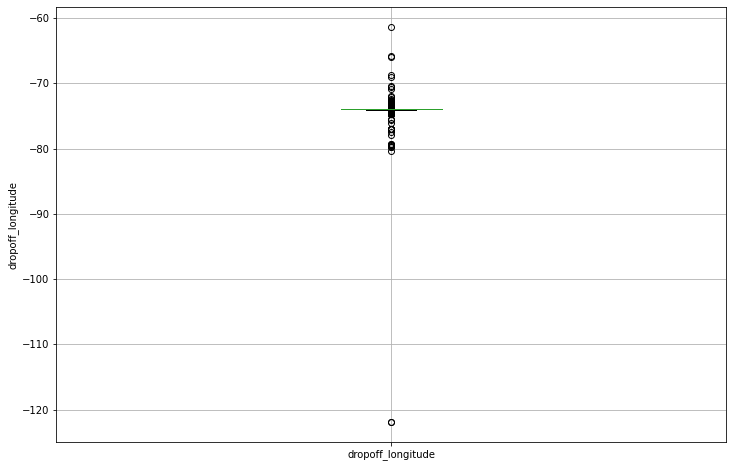

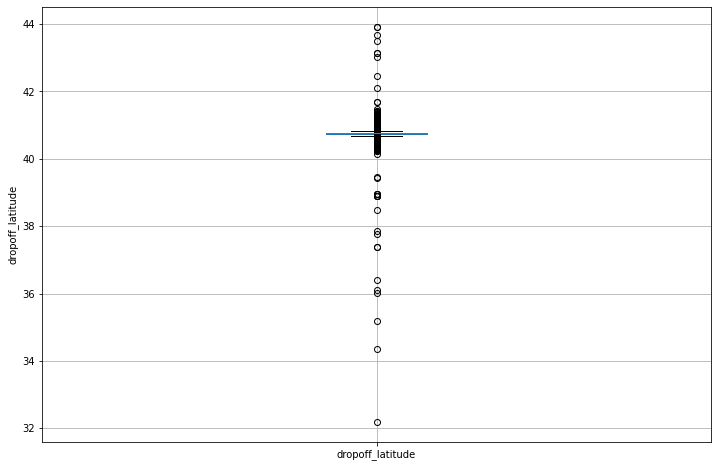

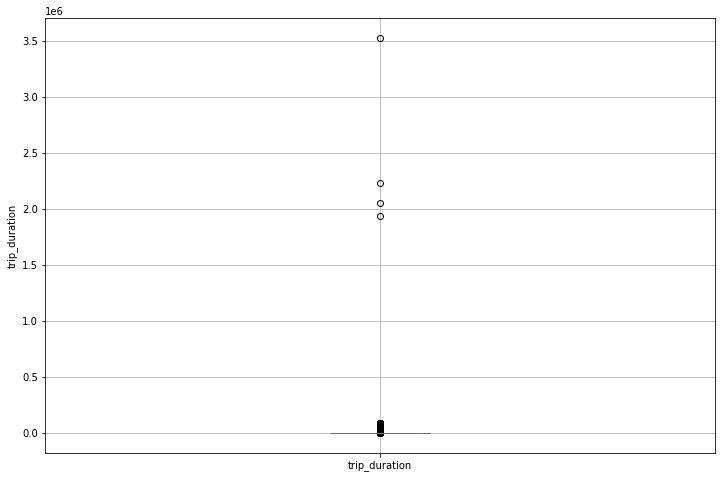

In [21]:
for i in num_df:
  fig, ax = plt.subplots(ncols=1,figsize=(12,8))
  df.boxplot(column=i, ax=ax)
  ax.set_ylabel(i)
plt.show()

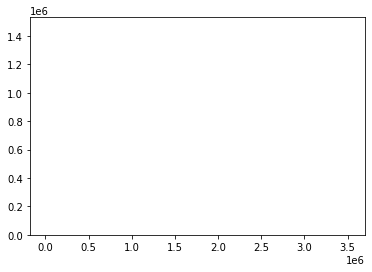

In [22]:
for i in num_df:
  figsize=(12,8)
  plt.hist(df[i],color='red',width=0.5)
plt.show()

In [59]:
df['pickup_datetime']=pd.to_datetime(df.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime']=pd.to_datetime(df.dropoff_datetime,format='%Y-%m-%d %H:%M:%S')

In [60]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [61]:
def month(m):
  r= m.strftime("%B")
  return str(r)

df['pickup_month']=df['pickup_datetime'].apply(lambda x: month(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))
df['dropoff_month']=df['dropoff_datetime'].apply(lambda x: month(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))

In [26]:
type(df.pickup_datetime)

pandas.core.series.Series

In [62]:
def timezone(t):
  if t>=dt.time(4,00,00)and t<=dt.time(5,59,59):
    return 'Early Morning'
  elif t>=dt.time(6,00,00) and t<=dt.time(11,59,59):
    return 'Morning'
  elif t>=dt.time(12,00,00) and t<=dt.time(15,59,59):
    return 'Afternoon'
  elif t>=dt.time(16,00,00) and t<=dt.time(20,59,59):
    return 'Evening'
  elif t>=dt.time(21,00,00) or t<=dt.time(3,59,59):
    return 'Night'
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))

In [28]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,January,January,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,January,January,Night,Night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,January,January,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,January,January,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,January,January,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,January,January,Afternoon,Afternoon
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,January,January,Morning,Morning
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,January,January,Morning,Morning
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,January,January,Afternoon,Evening


In [29]:
df['pickup_timezone'].unique()


array(['Evening', 'Night', 'Morning', 'Afternoon', 'Early Morning'],
      dtype=object)

In [30]:
df['dropoff_timezone'].unique()

array(['Evening', 'Night', 'Afternoon', 'Morning', 'Early Morning'],
      dtype=object)

Text(0.5, 1.0, 'No of Pickups')

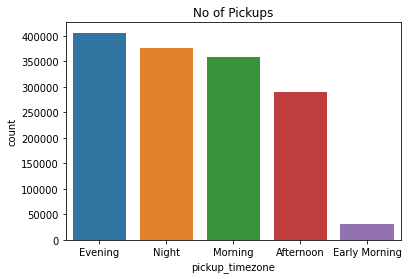

In [31]:
figsize=(12,8)
sns.countplot(x=df.pickup_timezone, data=df)
plt.title('No of Pickups')

Text(0.5, 1.0, 'No of Dropoffs')

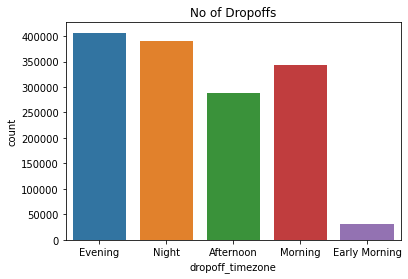

In [32]:
figsize=(12,8)
sns.countplot(x=df.dropoff_timezone, data=df)
plt.title('No of Dropoffs')

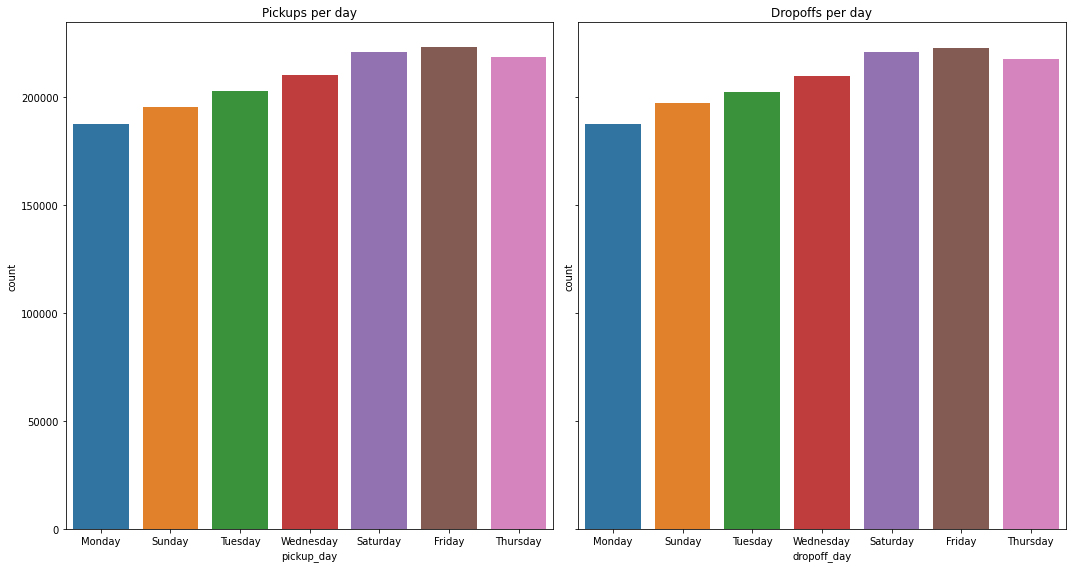

In [33]:
fig, ax=plt.subplots(ncols=2,sharex=True, sharey=True, figsize=(15,8))
sns.countplot(x=df.pickup_day,data=df, ax=ax[0])
ax[0].set_title('Pickups per day')
sns.countplot(x=df.dropoff_day,data=df, ax=ax[1])
ax[1].set_title('Dropoffs per day')
# plt.tight_layout()
fig.tight_layout()

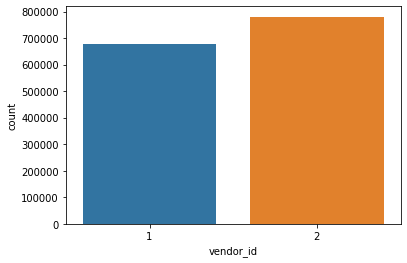

In [34]:
figsize=(12,8)
sns.countplot(x=df.vendor_id, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


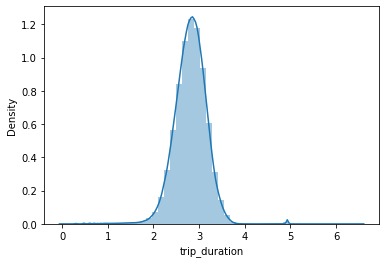

In [35]:
figsize=(12,9)
sns.distplot(np.log10(df['trip_duration']))#normalization as the data was skewed

Text(0.5, 1.0, 'No of dropoffs per day')

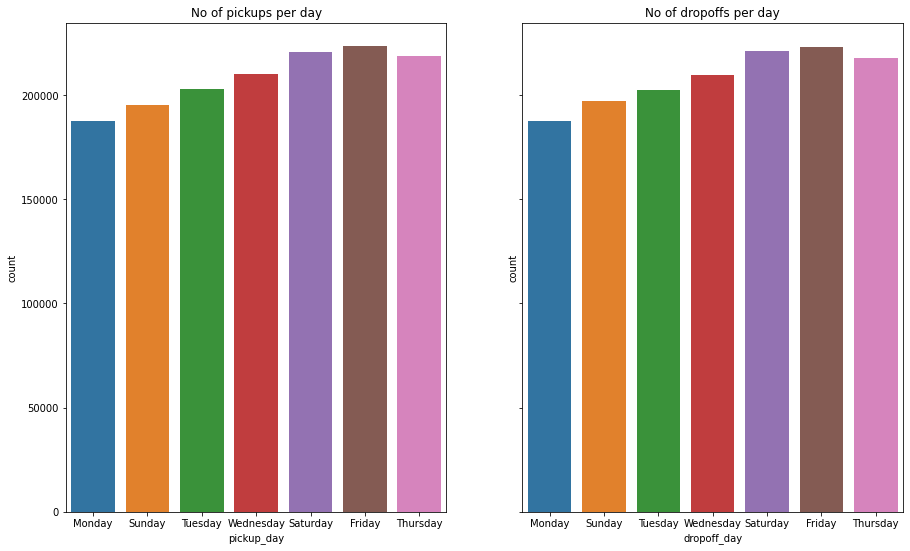

In [36]:
fig, ax=plt.subplots(ncols=2, sharex=True,sharey=True,figsize=(15,9))
sns.countplot(x=df.pickup_day,data=df, ax=ax[0])
ax[0].set_title('No of pickups per day')
sns.countplot(x=df.dropoff_day,data=df, ax=ax[1])
ax[1].set_title('No of dropoffs per day')



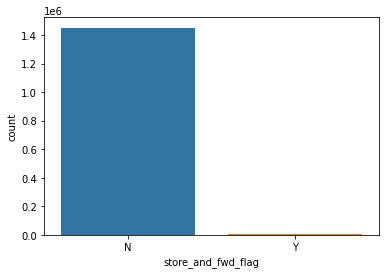

In [37]:
figsize=(12,8)
sns.countplot(x=df.store_and_fwd_flag, data=df)

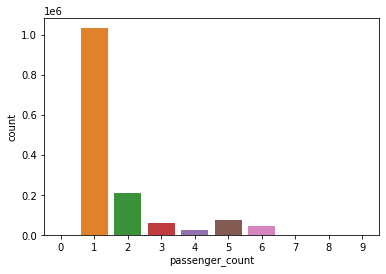

In [38]:
figsize=(12,8)
sns.countplot(x=df.passenger_count, data=df)

In [63]:
def dist(lat1,lat2,log1,log2):
  # lat_1= radians(lat1)
  # lat_2= radians(lat2)
  # log_1= radians(log1)
  # log_2= radians(log2)
  # dist_lat=lat_2-lat_1
  # dist_log=log_2-log_1

  # a= sin(dist_lat/2)**2 + cos(lat_1) * cos(lat_2) * sin(dist_log/2)**2
  # c= 2 *atan2(sqrt(a).sqrt(1-a))

  # r=6371
  # return(c*r)
  loc1=(lat1,log1)
  loc2=(lat2,log2)

  return geopy.distance.vincenty(loc1,loc2).km

df['distance']=df.apply(lambda x: dist(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)

In [64]:
df['distance']=np.log(df.distance)
df['trip_duration']=np.log(df.trip_duration)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,January,January,Evening,Evening,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,January,January,Night,Night,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,January,January,Morning,Afternoon,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,January,January,Evening,Evening,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,January,January,Afternoon,Afternoon,1.187038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,January,January,Afternoon,Afternoon,1.227090
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,January,January,Morning,Morning,6.046212
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,January,January,Morning,Morning,7.821532
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,January,January,Afternoon,Evening,1.092524


In [41]:
df.head(25)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,January,January,Evening,Evening,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,January,January,Night,Night,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,January,January,Morning,Afternoon,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,January,January,Evening,Evening,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,January,January,Afternoon,Afternoon,1.187038
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,Saturday,Saturday,January,January,Night,Night,1.099625
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,Friday,Friday,January,January,Night,Night,1.327329
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,Saturday,Saturday,January,January,Morning,Morning,5.718013
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,Friday,Friday,January,January,Night,Night,1.312559
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Thursday,Thursday,January,January,Night,Night,5.114807


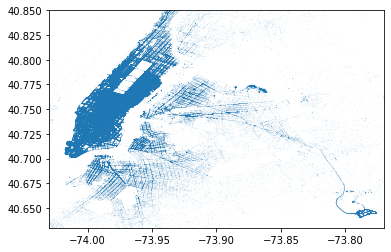

In [65]:
lng=list(df.pickup_longitude)+list(df.dropoff_longitude)
lati=list(df.pickup_latitude)+list(df.dropoff_latitude)
figsize=(12,10)
plt.plot(lng,lati,'.',alpha=0.4,markersize=0.05)
plt.xlim(-74.03,-73.77)
plt.ylim(40.63,40.85)
plt.show()

In [66]:
# map_scatter=px.scatter_mapbox(df,lat='pickup_latitude',lon='pickup_longitude',title="Pickup locations with respective details")
# map_scatter.update_layout(mapbox_style="open-street-map")
# map_scatter.show()

In [67]:
# locations=list(zip(df.pickup_latitude,df.pickup_longitude))
# m=folium.Map(location=[40.80,-73.7],zoom_start=9)
# FastMarkerCluster(data=locations).add_to(m)
# m

In [68]:
# import plotly.express as px
# import geopandas as gpd

# px.set_mapbox_access_token(open(".mapbox_token").read())
# fig = px.scatter_mapbox(df,
#                         lat=df.pickup_latitude,
#                         lon=df.pickup_longitude,
#                         hover_name="pickup_timezone",
#                         zoom=1)
# fig.show()

In [69]:
num_feature=df.describe().columns

In [70]:
num_feature

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance'],
      dtype='object')

In [71]:
num_feature.drop('vendor_id')

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance'],
      dtype='object')

In [72]:

p_1=np.percentile(df['distance'],25)
p_3=np.percentile(df['distance'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['distance']>low_lim]
df=df[df['distance']<up_lim]

df.shape


(1433716, 18)

In [73]:
p_1=np.percentile(df['passenger_count'],25)
p_3=np.percentile(df['passenger_count'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['passenger_count']>low_lim]
df=df[df['passenger_count']<up_lim]

df.shape

(1281375, 18)

In [74]:
p_1=np.percentile(df['trip_duration'],25)
p_3=np.percentile(df['trip_duration'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['trip_duration']>low_lim]
df=df[df['trip_duration']<up_lim]

df.shape

(1270291, 18)

In [74]:
#onehot encoding
df=pd.get_dummies